# Week 4: Machine learning 1

Machine learning is a technique for learning patterns in data that enable computers to make decisions and predictions. It's probably one of the hottest skills to master as a scientist or engineer in research or industry today. This week, we'll get an overview of what machine learning is, what it can be used for and what its limits are. Without worrying too much about what goes on behind the scenes, we will play around with a few classifiers in Python and test model performance using cross validation. The exercises today cover:

* Feature representation
* Model fitting
* Model evaluation
* Prediction results

## Exercises

We want to predict whether a character is a hero or a villain from information that we can extract from their markup. This is a large problem that includes some data wrangling, model fitting and a bit of evaluation. Therefore the problem is split into parts.

### Part 1: Feature representation
In it's raw format, the data cannot be given to a machine learning algorithm. What we must do is extract features from the data and put them into a structured format. This is the same as what we did when we looked at a dog (the data) and extracted into a matrix whether it was fluffy, sad looking, etc. (the features). The feature we will extract here is **team alliances**.

We can represent the team alliances of each character as a row in a matrix where each column corresponds to a particular team. That should look something like this (numbers are made up):

<img src="http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_boa.png" width="400"/>

**Note**: The following exercises relies on the dataset you produced in Ex. 3.1.2 (character markup stored on your computer). If you didn't manage to produce the dataset [use this](https://github.com/dhsvendsen/practical_data_science/tree/master/data) and go back and complete it at a later time so that you get the most out of this session.

> **Ex.4.1.1 (solved)**: Write a function called `get_alliances` that takes the name of a character and returns a list of teams that the character is allied with. Print the alliances of Scarlet Witch.
>
>*Hint: There is a place in the character markup where you'll find the team affiliations and you want to write some code that can extract that. The affiliations are not always listed the same way so you should probably try to eyeball some of the documents to get a feel for how the formatting can look.*

In [5]:
import re, os

def get_alliances(char, faction=None):
    """Return list of alliances for Marvel character.
    
    Input
    -----
        char : str
            A valid character name of any faction
        faction : str
            Either 'heroes', 'villains', 'ambiguous' or None. If None, the function
            looks through the respective faction folders to figure out which faction
            `char` belongs to. The function is therefore FASTER if `faction` is provided
    
    Output
    ------
        out : list of strings
            List of alliance names
    """
    
    # If faction is not provided, figure out which faction it is by looping through
    # folders of character names
    if faction is None:
        for faction in ["heroes", "villains", "ambiguous"]:
            if char + ".txt" in os.listdir("../../data/%s" % faction):
                break
    
    # Load character markup
    with open("../../data/%s/%s.txt" % (faction, char)) as fp:
         markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"\| *alliances[\w\W]+?(?=\|.+=|\}\})", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return [
        t[2:-1]
        for t in re.findall(r"\[\[.+?[\]\|\#]", alliances_field[0][10:])
        if not 'List of' in t
    ]

In [6]:
get_alliances("Abomination (character)")

['KGB', 'Advanced Idea Mechanics', 'Masters of Evil', 'Lethal Legion']

> **Ex.4.1.2**: Produce a **sorted** (i.e. use the ``.sort()`` method) list called `all_teams` that contains all teams in the entire Marvel universe. Print the first 10.

In [7]:
#Answer to 4.1.2
import os
from tqdm import tqdm
from collections import defaultdict

#Create a dictionary to store all the alliances and how many characters are in them
all_alliances_member_counts = defaultdict()

#Create a list of categories to make the code more concise 
character_categories = ['heroes', 'villains', 'ambiguous']

#Iterate through the folder for each character type
for character_category in character_categories:
    filepath = '../../data/%s'%character_category
    
    #iterate through all the files and get their names
    for file in tqdm(os.scandir(filepath)):
        f = open(file, "r")

        #Make sure we access the file without any issues
        try:
            alliances = get_alliances(f.name.split("/")[-1][0:-4], character_category)
        except:
            print("There was a problem accessing %s's file."%f.name.split("/")[-1][0:-4])
            break
        
        #Check if the alliance exists already, if not add it to the dict, if so add it its member count
        for i in alliances:
            if i not in list(all_alliances_member_counts.keys()):
                all_alliances_member_counts[i] = 0
            else:
                all_alliances_member_counts[i] += 1


#Create a list that will hold all the alliances(keys) from the dictionary
all_teams = list(all_alliances_member_counts.keys())

#Sort and print the first 10
all_teams.sort()
print(all_teams[0:10])

446it [00:01, 255.91it/s]
649it [00:02, 258.84it/s]
105it [00:00, 252.15it/s]

['1991 in comics', 'A-Force', 'A-Next', 'A.I. Army', 'A.R.M.O.R.', 'Acolytes (comics)', 'Advanced Idea Mechanics', 'Agents of Atlas', 'Agents of Fortune (comics)', 'Alchemax']


> **Ex.4.1.3**: Write a function that takes the name of a character and returns a vector representation of the team alliances for that character. The length of the returned list will be `len(all_teams)` and have 0s in the places corresponding to teams that the character is not on, and 1s in the places corresponding to teams the character is on. It may look something like:
>
>        [0, 0, 0, 0, 0, 1, 0, 0, ..., 0]
>
> Print the sum of the list returned when the input to the function is "Scarlet Witch". Show that this sum is equal to `len(get_alliances("Scarlet Witch"))`.

In [9]:
#Answer to 4.1.3

#Method to create and return a vector indicating if a character is in an alliance correspinding to the position in the vector
def get_character_team_vector(character, faction = None):
    #List of all alliances the given character is a part of
    list_of_alliances = get_alliances(character, faction)
    list_of_alliances.sort()
    
    #List of zeros that correspond to possible alliances characters can be a part of
    is_in_alliance = list(zip(all_teams, [0 for i in range(len(all_teams))]))
    
    #Zip() creates tuples, but we need to be able to modify the values, so convert the tuples into lists
    is_in_alliance = [list(i) for i in is_in_alliance]
        
    #For each alliance, check if the character is in it, changing the associated value to 1 if so
    for i in is_in_alliance:
        if i[0] in list_of_alliances:
            i[1] = 1
                
    return [i[1] for i in is_in_alliance]

#Check to make sure it works
assert(len(get_alliances("Scarlet Witch")) == sum(get_character_team_vector("Scarlet Witch")))
        

> **Ex. 4.1.4**: Vectorize and save your data:
1. Create a feature matrix (a "team alliance matrix") similar in form to the matrix illustrated at the top of this notebook, in that every row corresponds to a character and every column a team. In a seperate *target* array: store whether characters are villains (denote by 0), heroes (denote by 1) or ambiguous (denote by 2). **Do not include characters that have no team alliances**. The number of rows in your feature matrix should equal the length of the target array. **Print their shapes to show that they match each other.**

In [10]:
#Answer to 4.1.4.1
import numpy as np

#Create the array which will store the alliances matrixes for all the teams.
#Create a scond array to keep track of the names of characters added(will be needed later)
#Create the
team_alliance_matrix = []
team_alliance_matrix_names = []
character_alignment_array = []

#Create a list of categories, associated numbers, to make the code more concise 
character_categories = ['heroes', 'villains', 'ambiguous']
character_category_numbers = [1, 0, 2]
i = 0

#Create a variable to keep track of how many characters actually have alliances
num_chars_added = 0

#Iterate through the folder for each character type
for character_category in character_categories:
    filepath = '../../data/%s'%character_category
    
    #iterate through all the files and get their names
    for file in tqdm(os.scandir(filepath)):
        f = open(file, "r")
        
        #First check to see if a given character has any alliances, skip them if not
        alliances = get_alliances(f.name.split("/")[-1][0:-4], character_category)
        if len(alliances) == 0:
            continue
            
        #Make sure we access the file without any issues
        try:
            character_alliance_matrix = get_character_team_vector(f.name.split("/")[-1][0:-4], character_category)
        except:
            print("There was a problem accessing %s's file."%f.name.split("/")[-1][0:-4])
            break
        
        #Add the new character alliance matrix to the general list
        team_alliance_matrix.append(character_alliance_matrix)
        
        #Add the character allignment to the character allignment array
        character_alignment_array.append(character_category_numbers[i])
        num_chars_added += 1
        
        #Add the charater name to the list of characters that acually have alliances
        team_alliance_matrix_names.append(f.name.split("/")[-1][0:-4])
    
    #Switch to the next character allignment number
    i += 1
    
    #To see how many characters actually had alliances in the first place
    print("Added " + str(num_chars_added) + " %s to the team alliance matrix."%character_category) 
    num_chars_added = 0

assert(len(team_alliance_matrix) == len(character_alignment_array))
print(len(team_alliance_matrix))
print(len(character_alignment_array))
print(len(team_alliance_matrix[0]))

446it [00:02, 213.69it/s]


Added 297 heroes to the team alliance matrix.


649it [00:02, 265.78it/s]


Added 329 villains to the team alliance matrix.


105it [00:00, 227.28it/s]

Added 85 ambiguous to the team alliance matrix.
711
711
439


2. Create a new `pandas.DataFrame` called `data` that stores all this data. Rows should be indexed with character names, columns should be indexed team names and the rightmost column should be the target array. [Here is what it should look like](https://dhsvendsen.github.io/images/BD_4_1_4_2.png) (depending on the data you were able to scrape from wikipedia). Save this dataframe as a CSV file to a local folder. Load it again and **show that it looks right** (don't use `print`!), you will need it in the coming weeks.

In [7]:
#Answer to 4.1.4.2
import pandas as pd

#First we have to add the faction attribute to the end of all the team vectors
if len(team_alliance_matrix[0]) < 440: #to make sure we only run it once
    for i in range(len(team_alliance_matrix)):
        team_alliance_matrix[i].append(character_alignment_array[i])

#Create a dictionary with all the characters and their respective team vectors
#to make it easier to get them into a data frame
team_alliance_dict = {}

#Need to add this to the teams list to account for the extra value in the team vector
if len(all_teams) < 440:
    all_teams.append("faction")

#Add the chracters as keys, team vector as value
for i in range(len(team_alliance_matrix)):
    team_alliance_dict[str(team_alliance_matrix_names[i])] = team_alliance_matrix[i]
    
#Create the dataframe, populate with the alliances as the named indexes
data = pd.DataFrame(team_alliance_dict, index = all_teams)

print(data)

#Create the csv file, add it to the data directory
data.to_csv(r'../../data/data.csv')

                 Abomination (character)  Adam Warlock  Ajak  Amadeus Cho  \
1991 in comics                         0             0     0            0   
A-Force                                0             0     0            0   
A-Next                                 0             0     0            0   
A.I. Army                              0             0     0            0   
A.R.M.O.R.                             0             0     0            0   
...                                  ...           ...   ...          ...   
Young Avengers                         0             0     0            0   
Young Masters                          0             0     0            0   
Young X-Men                            0             0     0            0   
Zodiac (comics)                        0             0     0            0   
faction                                1             1     1            1   

                 Amanda Sefton  Anole (comics)  Anya Corazon  \
1991 in com

### Part 2: Model fitting

> **Ex. 4.2.1**: Take the feature matrix and target array that you created in Ex. 4.1.4 and **remove the rows that correspond to ambiguous characters**. Now, train a classifier for predicting hero or villain on all of this data and test its accuracy on the same data you trained on.
>
>* If your team alliance matrix is `X_ta` and your target array is `y_ta` you can do this by instantiating a model like:
>
>        from sklearn.naive_bayes import BernoulliNB
>        model = BernoulliNB()
>        model.fit(X_ta, y_ta)  # <--- This is the training step
>        
> *Note:* The `BernoulliNB` is a version of the Naive Bayes classifier which associates certain features with labels and asks what the probability of a label for a data point is given its features. You are free to use any other classifier if you want. Popular ones are trees, random forests, support vector machines, feed forward neural networks, logistic regression, and the list goes on. With `sklearn`, they are just as easy to employ as the `BernoulliNB` classifier.
>
>
>1. Test the accuracy of your model. Report the *training accuracy* of your model—that is testing on the same data that you trained the model on. 
>
> *Hint: `model.predict(X_ta)` will give you predictions for each datapoint.*

In [35]:
#Answer to 4.2.1.intro
from sklearn.naive_bayes import BernoulliNB

#First remove all the ambiguous characters from the team alliance matrix and allignment array
team_alliance_matrix_no_amb = []
character_alignment_array_no_amb = []

for i in range(len(team_alliance_matrix)):
    if character_alignment_array[i] != 2:
        team_alliance_matrix_no_amb.append(team_alliance_matrix[i])
        character_alignment_array_no_amb.append(character_alignment_array[i])
        
#Create and train the model
model = BernoulliNB()
model.fit(team_alliance_matrix_no_amb, character_alignment_array_no_amb)


BernoulliNB()

In [41]:
#Answer to 4.2.1.1

#We will test the model on all the data from the team alliance matrix
faction_predictions = model.predict(team_alliance_matrix_no_amb)

#Compute the number of true positives, false positives, true negavites, and false negatives
true_positives, true_negatives, false_positives, false_negatives = 0, 0, 0, 0
for i in range(len(faction_predictions)):
    if team_alliance_matrix[i][-1] == 0 and faction_predictions[i] == 0:
        true_positives += 1
    if team_alliance_matrix[i][-1] == 1 and faction_predictions[i] == 1: 
        true_negatives += 1
    if team_alliance_matrix[i][-1] == 1 and faction_predictions[i] == 0:
        false_positives += 1
    if team_alliance_matrix[i][-1] == 0 and faction_predictions[i] == 1:
        false_negatives += 1
        
#Compute the accuracy
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

#Print the Accuracy
print("Our model has an accuracy of " + str(accuracy) + ".")
print(faction_predictions)
print(true_positives, true_negatives, false_positives, false_negatives)

Our model has an accuracy of 0.9984025559105432.
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

2. Which *baseline accuracy* does this model have to compete with? In other words, what accuracy would you get if you always predicted the majority class?

In [30]:
#Answer to 4.2.1.2

#The majority class is the villains, and the baseline accuracy 
#would be the number of villains over the total characters in question

#From 4.1.4.1 we know that 329 of the 626 characters are villains, so 
#compute and print the percentage of characters that are villains

print("Of the 626 characters, " + str(329/626) + " percent of them are villains.")

Of the 626 characters, 0.5255591054313099 percent of them are villains.


3. Report the precision, recall and F1 scores, with respect to the **minority class**.

In [31]:
#Answer to 4.2.1.3

#Compute the precision, recall, and f1 score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = (2*precision*recall) / (precision + recall) 

#Print the results
print("Precision: " + str(precision), "Recall: " + str(recall), "F1_score: " + str(f1_score))

Precision: 1.0 Recall: 0.9966329966329966 F1_score: 0.9983136593591906


### Part 3: Model evaluation

> **Ex. 4.3.1**: Investigate how well your model generalizes. You may have noticed that the performance seemed a little too good to be true in Ex 4.2.1.
1. Why did you get such a high accuracy in the previous exercise?
>
> *Hint: Watch out for unbalanced class proportions! You may want to randomly reorder the rows of your datapoints and target labels so your training and test sets have the same amount of heroes and villains.*

#Answer to 4.3.1.1

The reason our accuracy was so high is because we tested on the exact data we trained on. The model knew exactly what factors determined a given character's faction, so it was really good a predicting it.

2. Split your data into a test and training set of equal size. Train the model only on the training set and report its accuracy and F1 score (for minority class) on both the training and test sets.

In [44]:
#Answer to 4.3.1.2
import random

#Add the alignment to the end of the team vectors for shuffling(we need them to have the same order)
if len(team_alliance_matrix_no_amb[0]) != 440:
    for i in range(len(team_alliance_matrix_no_amb)):
        team_alliance_matrix_no_amb[i].append(character_alignment_array_no_amb[i])

#Shuffle, split in two
random.shuffle(team_alliance_matrix_no_amb)
team_alliance_matrix_no_amb_training = team_alliance_matrix_no_amb[(len(team_alliance_matrix_no_amb)//2):]
team_alliance_matrix_no_amb_testing = team_alliance_matrix_no_amb[:(len(team_alliance_matrix_no_amb)//2)]

#Recreate the alignment vector
character_alignment_array_no_amb_training = [i[-1] for i in team_alliance_matrix_no_amb_training]
character_alignment_array_no_amb_testing = [j[-1] for j in team_alliance_matrix_no_amb_testing]

#Create and train the model
model = BernoulliNB()
model.fit(team_alliance_matrix_no_amb_training, character_alignment_array_no_amb_training)

##########################################################################################################

#We will test the model first on the test data
faction_predictions_testing = model.predict(team_alliance_matrix_no_amb_testing)

#Compute the number of true positives, false positives, true negavites, and false negatives
true_positives, true_negatives, false_positives, false_negatives = 0, 0, 0, 0
for i in range(len(faction_predictions_testing)):
    if team_alliance_matrix[i][-1] == 0 and faction_predictions_testing[i] == 0:
        true_positives += 1
    if team_alliance_matrix[i][-1] == 1 and faction_predictions_testing[i] == 1: 
        true_negatives += 1
    if team_alliance_matrix[i][-1] == 1 and faction_predictions_testing[i] == 0:
        false_positives += 1
    if team_alliance_matrix[i][-1] == 0 and faction_predictions_testing[i] == 1:
        false_negatives += 1
        
#Compute the accuracy
accuracy_testing = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

#Compute the F1 Score
precision_testing = true_positives / (true_positives + false_positives)
recal_testing = true_positives / (true_positives + false_negatives)
f1_score_testing = (2*precision*recall) / (precision + recall)

##########################################################################################################

#Now we test on the training data
faction_predictions_training = model.predict(team_alliance_matrix_no_amb_training)

#Compute the number of true positives, false positives, true negavites, and false negatives
true_positives, true_negatives, false_positives, false_negatives = 0, 0, 0, 0
for i in range(len(faction_predictions_training)):
    if team_alliance_matrix[i][-1] == 0 and faction_predictions_training[i] == 0:
        true_positives += 1
    if team_alliance_matrix[i][-1] == 1 and faction_predictions_training[i] == 1: 
        true_negatives += 1
    if team_alliance_matrix[i][-1] == 1 and faction_predictions_training[i] == 0:
        false_positives += 1
    if team_alliance_matrix[i][-1] == 0 and faction_predictions_training[i] == 1:
        false_negatives += 1
        
#Compute the accuracy
accuracy_training = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

#Compute the F1 Score
precision_training = true_positives / (true_positives + false_positives)
recal_training = true_positives / (true_positives + false_negatives)
f1_score_training = (2*precision*recall) / (precision + recall)


#Print the results
print("When testing on the designated testing dataset, we attained an accuracy of " + str(accuracy_testing) + 
     " and an F1 score of " + str(f1_score_testing) + ".")
print("When we switched back to the training data, we attained an accuracy of " + str(accuracy_training) + 
     " and an F1 score of " + str(f1_score_training) + ".")

When testing on the designated testing dataset, we attained an accuracy of 0.5015974440894568 and an F1 score of 0.9983136593591906.
When we switched back to the training data, we attained an accuracy of 0.43769968051118213 and an F1 score of 0.9983136593591906.


3. Comment on the difference you observe.


#Answer to 4.3.1.3

The model is now much less accurate because it doesn't have access to all the data when training, so it doesn't "know all the answers of the top of its head." 

> **Ex. 4.3.2**: Implement cross validation using the [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) method. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Explain how the `KFold` function (imported from `sklearn.model_selection`) works.

#Answer to 4.3.2.1

The KFold function trains/tests the model on different portions of the data such that every part of the data is trained and tested on. 

2. Using `KFold`, implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. Why are training accuracies consistently higher than testing accuracies (comment)?.

In [40]:
#Answer to 4.3.2.2

from sklearn.model_selection import KFold

#Create the splits for the data
k = 10
kf = KFold(n_splits = k, shuffle = True)

#Create array to store accuracies
accuracies = []

print(kf.split(X))

NameError: name 'X' is not defined

### Part 4: Predicting good vs. evil

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data (still only heroes and villains).
* Get a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments. It produces an array with two columns, where the 1st column is the probability of class 1 (which is heroes).
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

[[9.99857053e-01 1.42947019e-04]
 [6.98519288e-01 3.01480712e-01]
 [8.88307544e-01 1.11692456e-01]
 [3.61686193e-01 6.38313807e-01]
 [4.64926905e-03 9.95350731e-01]
 [2.97303856e-01 7.02696144e-01]
 [8.76397299e-01 1.23602701e-01]
 [8.75484509e-01 1.24515491e-01]
 [6.59183083e-01 3.40816917e-01]
 [9.94458787e-01 5.54121261e-03]
 [4.39949409e-01 5.60050591e-01]
 [9.91974546e-01 8.02545398e-03]
 [9.73141162e-01 2.68588381e-02]
 [8.78636583e-01 1.21363417e-01]
 [2.77016612e-01 7.22983388e-01]
 [7.04484051e-01 2.95515949e-01]
 [7.95135606e-01 2.04864394e-01]
 [4.40945107e-02 9.55905489e-01]
 [4.22663933e-02 9.57733607e-01]
 [4.38234224e-01 5.61765776e-01]
 [9.22508967e-01 7.74910329e-02]
 [9.03541458e-03 9.90964585e-01]
 [6.25936197e-01 3.74063803e-01]
 [9.98437496e-01 1.56250391e-03]
 [9.70278035e-01 2.97219648e-02]
 [7.55587759e-01 2.44412241e-01]
 [7.23188321e-01 2.76811679e-01]
 [4.10205368e-01 5.89794632e-01]
 [1.18589429e-01 8.81410571e-01]
 [6.58346428e-01 3.41653572e-01]
 [7.950288

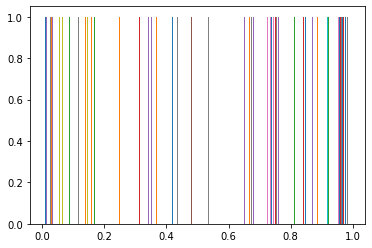

In [23]:
#Answer to 4.4.1
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

#Trarin new model on all the heroes and villains
model_44 = BernoulliNB()
model_44.fit(team_alliance_matrix_no_amb, character_alignment_array_no_amb)

#Get the ambiguous characters
team_alliance_matrix_amb = []
character_alignment_array_amb = []

for i in range(len(team_alliance_matrix)):
    if character_alignment_array[i] == 2:
        team_alliance_matrix_amb.append(team_alliance_matrix[i])
        character_alignment_array_amb.append(character_alignment_array[i])

#Test the model using the ambiguous characters
faction_predictions_amb = model_44.predict_proba(team_alliance_matrix_amb)
print(faction_predictions_amb)

#Visualize the data via histogram
faction_predictions_amb = [tuple(i) for i in faction_predictions_amb]
plt.hist(faction_predictions_amb, bins = 10)
plt.show()
